# BBM92 protocol

Komentare ku skuske:
V T1 ste merali oba krat na tom istom gubite, preto mate vysledky korelovane, hoci maju byt antikorelovane pre rovnake bazy [3b], po merani ste este pridavali Hadamardove brany, nebolo to potrebne, lebo s qubitmi dalej nepracujeme, T2 OK, V T3 Vam uznavam ciastocne [lb], ze Vas druhy graf dokumentuje perfektnu korelaciu klucov, hoci ste mali ukazat antikorelaciu pri zhode baz v povodnych datach, ale Vas prvy graf pre nozhodne bazy tj. a!=b ukazuje ze nastavaju iba dve moznosti zo styroch. Uz tu ste mohli prijst na to, ze, mate niekde chybu 

*Bennett, Brassard, Mermin (1992)*

This QKD (or rather quantum key expansion) protocol is very similar to BB84. But unlike BB84 it makes use of entangled states. Without compromising security, its advantage is that the order in which Alice and Bob perform their measurements of the given entangled state does not have to be fixed. In contrast, in original BB84 Alice is always sending quantum systems to Bob and performing her state preparation before Bob’s measurement. The algorithm establishes secret key between Alice and Bob in a series of rounds, where in each round following protocol is followed:
1. Bell state $|\Psi^-\rangle=\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$ is prepared and distributed to Alice and Bob
2. Alice chooses her basis by random bit `a` and measures her qubit in this basis - if `a=0` she measures in the computational basis and if `a=1` she measures in the Hadamard basis. She obtains bit `x`.
3. Bob chooses his basis by random bit `b` and measures his qubit in this basis - if `b=0` he measures in the computational basis and if `b=1` he measures in the Hadamard basis.
4. Both Alice and Bob save their choices of basis and outcomes of the measurements - Alice saves `(a, x)` and Bob saves `(b, y)`.

After Alice and Bob perform enough rounds (`runs`), they share over an authenticated channel their basis choices for each round. They keep those bits `x` and `y` for which the bases coincided (`a=b`). The entanglement of the state $|\Psi^-\rangle$ is such that it produces anti-correlated measurement results in any basis used by both Alice and Bob for the measurement. Thus, in the case where the bases coincided the resulting bits `x` and `y` are also anticorrelated and this has to be accounted for (e.g. Bob can flip his bits). In the case where the bases were not the same, the results are completely random.

In [13]:
import qiskit
from qiskit.visualization import plot_histogram
from random import randint

runs = 4096
simulator = qiskit.Aer.get_backend('qasm_simulator')

qreg = qiskit.QuantumRegister(2)
creg = qiskit.ClassicalRegister(2)

**Task 1:** Write code in the field below that performs one round of the BBM92 protocol. The input parameters are `a` and `b`, the choices of basis of Alice and Bob. Function returns the circuit performing the task.

In [58]:
def bbm92(a, b):
    global qreg
    global creg
    
    circ = qiskit.QuantumCircuit(qreg, creg)
    
    # Write your code here. It should include
    #  1. State |Psi-> preparation
    circ.x(qreg[1]) 
    circ.h(qreg[0]) 
    circ.z(qreg[0]) 
    circ.z(qreg[1]) 
    circ.cx(qreg[0],qreg[1]) 
    #  2. Alice's measurement
    circ.barrier()
    if (a == 1):
        circ.h(0)
    circ.measure(0,0)
    #  3. Bob's measurement
    circ.barrier()
    if (b == 1):
        circ.h(1)
    circ.measure(0,1)
    
    return circ

You can see here how your circit looks like.

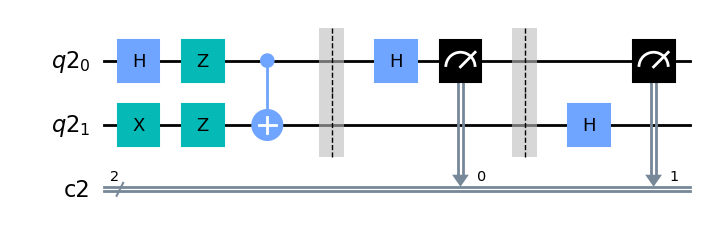

In [59]:
bbm92(1, 1).draw(output="mpl")

The following code performs `runs` rounds of the algorithm defined above. It stores the pairs `(a, x)` and `(b, y)` separately for Alice and Bob - they might be far away.

In [60]:
outA = []
outB = []

for _ in range(runs):
    a = randint(0, 1)
    b = randint(0, 1)
    
    res = qiskit.execute(bbm92(a, b), simulator, shots=1).result().get_counts()
    out = list(res.keys())[0]
    
    outA.append((a, out[1]))
    outB.append((b, out[0]))

**Task 2:** Use the stored results `outA` and `outB` to distill the keys for Alice and Bob into registers `keyA` and `keyB`. Remember to account for the anti-correlation of `x` and `y`.

In [61]:
# Publicly shared information of ALice and Bob
publicA = [x[0] for x in outA]
publicB = [y[0] for y in outB]

# Locally stored keys obtained using the public information
keyA = []
keyB = []

# Write here code that distills the keys for Alice and Bob


for i in range(runs):
    if publicA[i] == publicB[i]:
        keyA += [outA[i][1]]
        keyB += [outB[i][1]]


Running following command you can check how well your program performs.

In [62]:
corr = 0
for i in range(len(keyA)):
    if keyA[i] == keyB[i]:
        corr += 1
print(f"The two keys coincide in {100 * corr / len(keyA)}% of cases [correct program gives 100%]")
print(f"Your key length is {len(keyA)} [correct program gives roughly {runs / 2:.0f}]")

The two keys coincide in 100.0% of cases [correct program gives 100%]
Your key length is 2015 [correct program gives roughly 2048]


**Task 3:** Provide evidence that the outcomes `x` and `y` that Alice and Bob obtained above are anticorrelated when Alice's and Bob's bases coincided and were completely random otherwise (within expected deviations due to finite statistics originating from the number of runs performed).

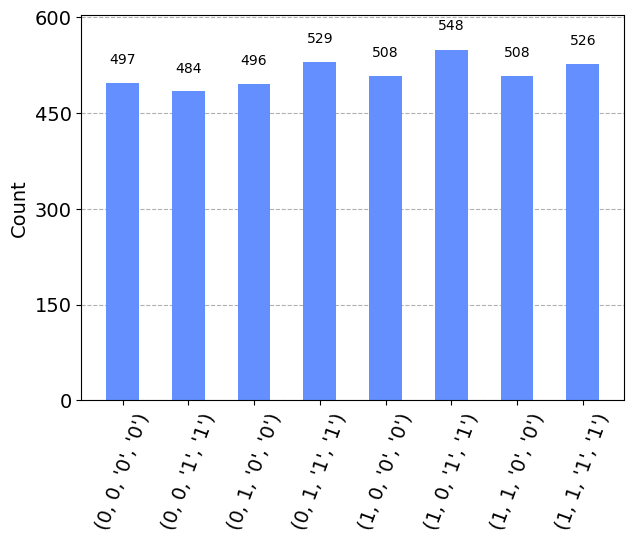

In [64]:
# Write here your code. It is up to you what form of presentation you will use

counts = {}
out = [(outA[i][0], outB[i][0], outA[i][1], outB[i][1]) for i in range(runs)]
for x in out:
    counts[x] = counts.get(x, 0) + 1
plot_histogram(counts)


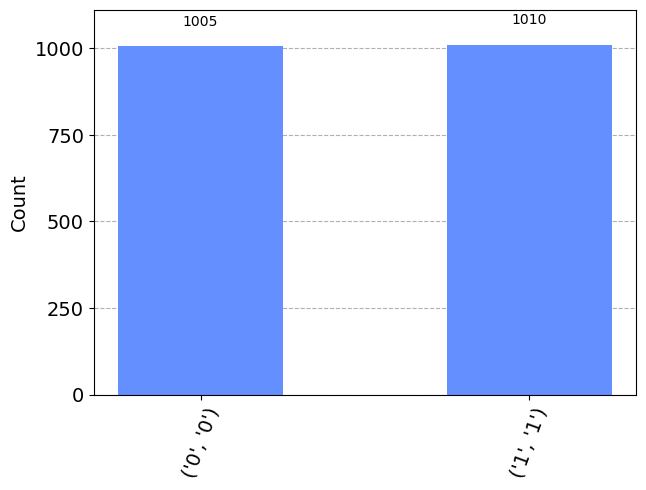

In [66]:
counts = {}
out = [(keyA[i], keyB[i]) for i in range(len(keyA))]
for x in out:
    counts[x] = counts.get(x, 0) + 1
plot_histogram(counts)

Note: We could go on and look at the security of this protocol, how well it stands against noise and eavesdropping. Similar considerations have been studied during the semester in BB84 protocol and if you programmed BBM92 protocol correctly, it would give basically the same results. We are not going to do it here.